# Problem Statement
Fraud occurs in many different areas, including e-commerce, healthcare, payments and banking. Fraud is a multi-billion dollar industry and growing every year. PwC's 2018 Global Fraud Survey found that half (49%) of the 7,200 companies surveyed had experienced some form of fraud.
Financial fraud refers to the use of legal and fraudulent means to obtain economic benefits. Financial fraud can be committed in many areas such as insurance, banking, tax and banking. In recent years, financial fraud, money laundering and other financial fraud have become a serious problem for companies and businesses. Although some efforts have been made to reduce financial fraud, its persistence has an impact on businesses and people, as large amounts of money are lost to fraud every day. Many scams have emerged over the years. Traditional methods are mostly manual; This is time consuming, expensive, inaccurate and impossible. Further research was conducted to reduce losses from fraud, but to no avail. As artificial intelligence (AI) advances, machine learning and data mining are being used to detect fraud in the financial sector. Use unaudited and audited methods to predict fraudulent activity. The classification system has been the most popular method of detecting financial fraud.

### Dataset link :- https://www.kaggle.com/code/samykhan/fraud-transactions-analysis-balancing-prediction/input

## Import

In [4]:
# Importing Libraries
import numpy as np
import pandas as pd

In [5]:
# read the data and show first 5 rows
df = pd.read_csv("D:\MAT-Assignments\Data analytics\Assignment 2\Fraud.csv")
new_df = pd.read_csv("D:\MAT-Assignments\Data analytics\Assignment 2\Fraud.csv",nrows=3000000)
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
pd.set_option('display.float_format', '{:.2f}'.format) # To see actual values
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [10]:
# checking for null values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
# No Duplicates
df.duplicated().sum()

0

## Exploratory Data Analysis

In [12]:
# set seaborn style because it prettier
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [13]:
# drop this kind of imbalance feature
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [14]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

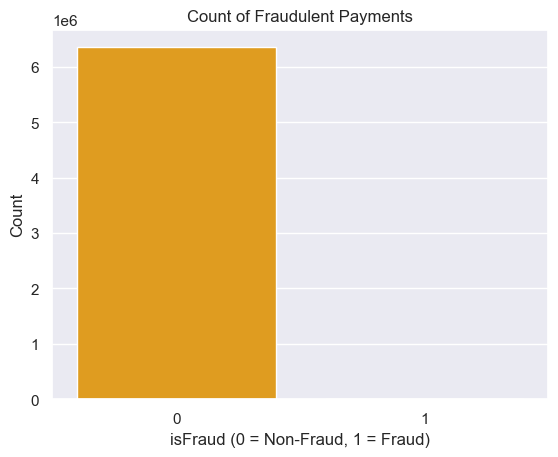

Number of normal examples:  6354407
Number of fraudulent examples:  8213


In [15]:
# Creating two dataframes with fraud and non-fraud data
df_fraud = df.loc[df.isFraud == 1]
df_non_fraud = df.loc[df.isFraud == 0]
sns.countplot(x="isFraud", data=df, palette={0: 'orange', 1: 'red'})
plt.title("Count of Fraudulent Payments")
plt.xlabel("isFraud (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# Printing  counts
print("Number of normal examples: ", df_non_fraud.isFraud.count())
print("Number of fraudulent examples: ", df_fraud.isFraud.count())

<AxesSubplot: >

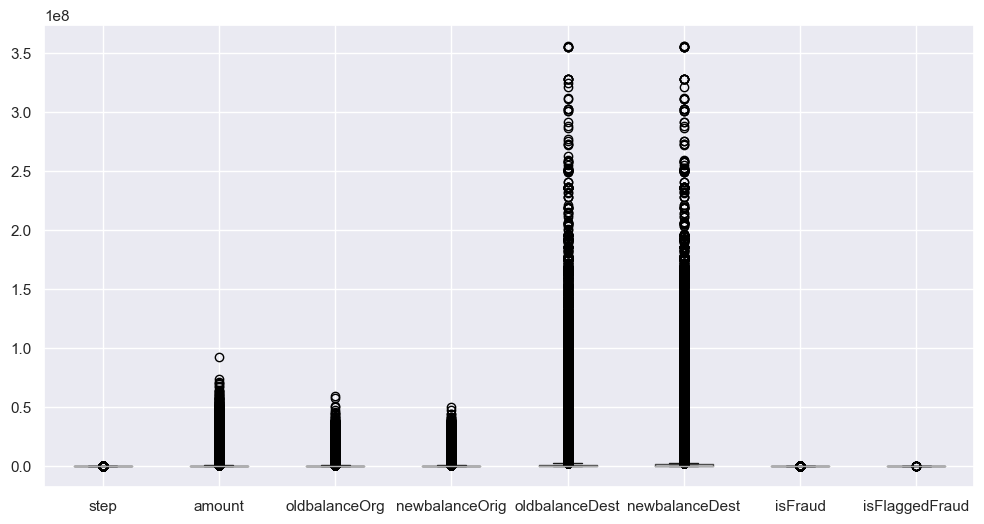

In [16]:
df.boxplot(figsize=(12,6))

In [17]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64','float64'])

# Calculate quantiles for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# The rest of your code to detect outliers should remain the same
def detect_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(df)) * 100
        return column, percentage

columns_with_outliers = [detect_outliers(column) for column in numeric_columns.columns]
columns_with_outliers = [(column, percentage) for column, percentage in columns_with_outliers if column is not None]

for column, percentage in columns_with_outliers:
    print(f"Column: {column}, Percentage of outliers: {percentage:.2f}%")

Column: step, Percentage of outliers: 1.61%
Column: amount, Percentage of outliers: 5.31%
Column: oldbalanceOrg, Percentage of outliers: 17.49%
Column: newbalanceOrig, Percentage of outliers: 16.56%
Column: oldbalanceDest, Percentage of outliers: 12.36%
Column: newbalanceDest, Percentage of outliers: 11.61%
Column: isFraud, Percentage of outliers: 0.13%
Column: isFlaggedFraud, Percentage of outliers: 0.00%


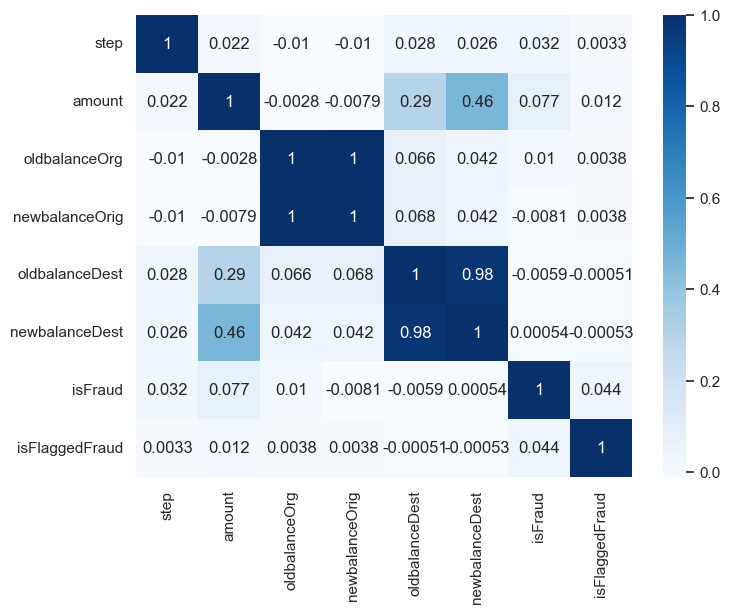

In [18]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()

In [19]:
# Due high Multicollinearity we will drop oldbalance data beacuse instead of that columns we can make use of newbalance data.
df.drop(columns=['oldbalanceDest', 'oldbalanceOrg'], inplace=True)

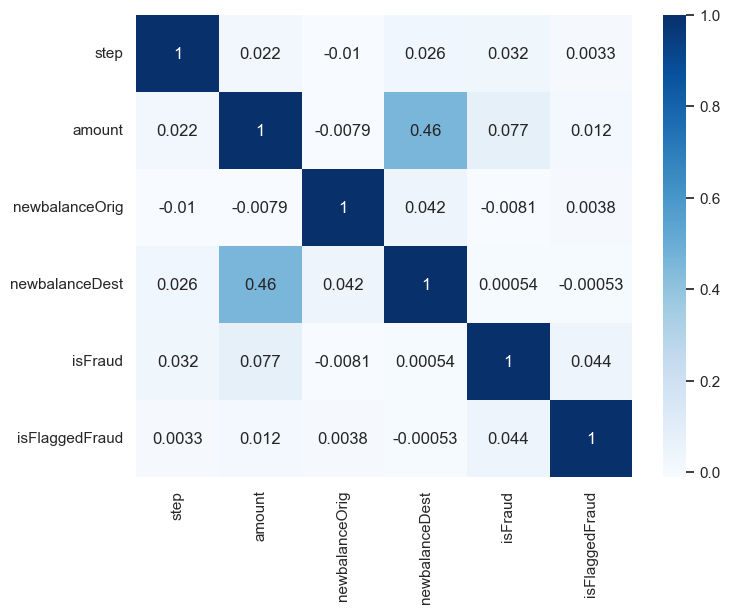

In [20]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()

Text(0.5, 1.0, 'Distribution of Transaction Types')

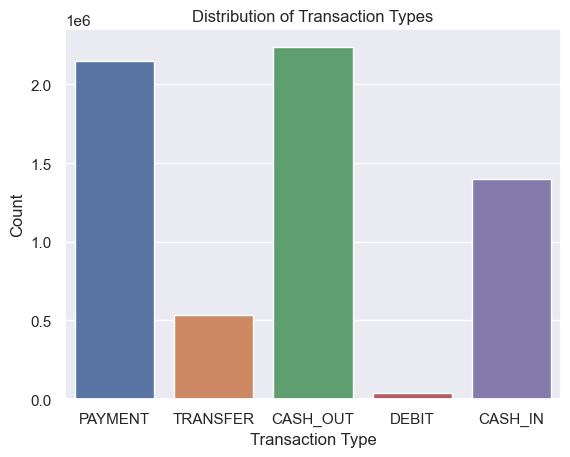

In [21]:
# Distribution of Transaction Types
sns.countplot(data=df, x='type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')

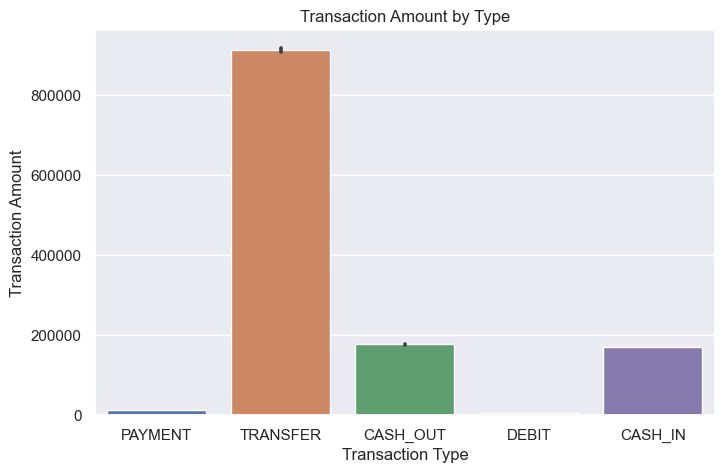

In [22]:
# the highest transaction amount is transfered by TRANSFER type
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='type', y='amount')
plt.xticks(rotation=0)
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Type')
plt.show()

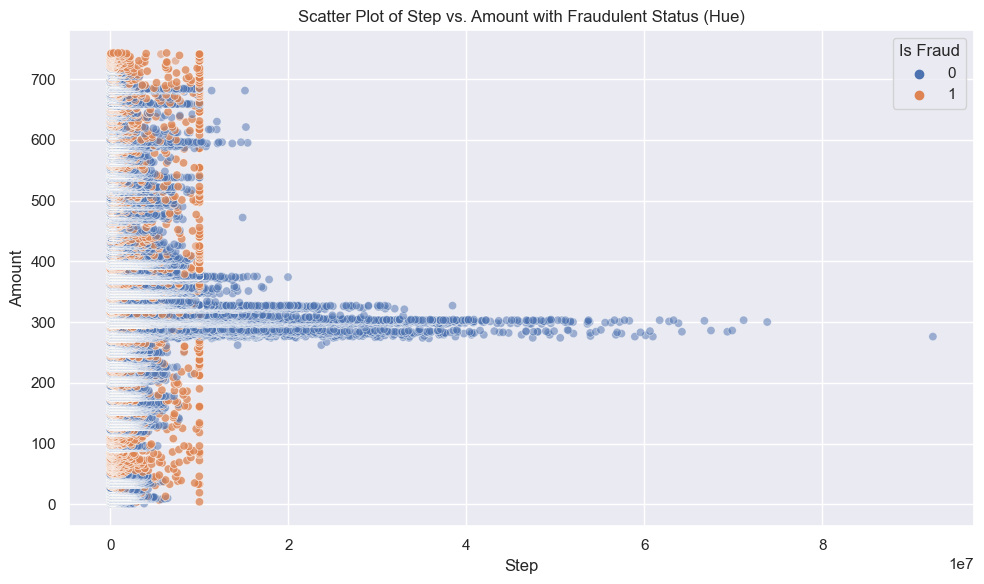

In [23]:
# There are total 744 steps, In this case 1 step is 1 hour of time
# Fraud transaction happend within 1 or 2 steps, means in less time

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='amount', y='step', hue='isFraud', alpha=0.5)
plt.xlabel('Step')
plt.ylabel('Amount')
plt.title('Scatter Plot of Step vs. Amount with Fraudulent Status (Hue)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Is Fraud')
plt.show()

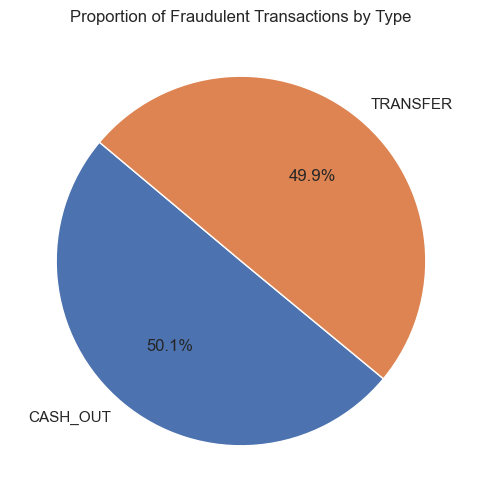

In [24]:
# Fraud transaction is happend by two types only 'TRANSFER' and 'CASH_OUT'
fraud_proportion = df[df['isFraud'] == 1]['type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fraud_proportion, labels=fraud_proportion.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Fraudulent Transactions by Type')
plt.show()

## USING new_df
* here we will use new_df because system was unable to handle whole data
* From df1 we will drop 'isFlaggedFraud' because it was highly imbalanced
* we have to drop highly correlated columns i.e 'oldbalanceOrg' and 'oldbalanceDest'.

In [25]:
new_df.drop(['oldbalanceOrg','oldbalanceDest','isFlaggedFraud'],axis=1,inplace=True)

<AxesSubplot: >

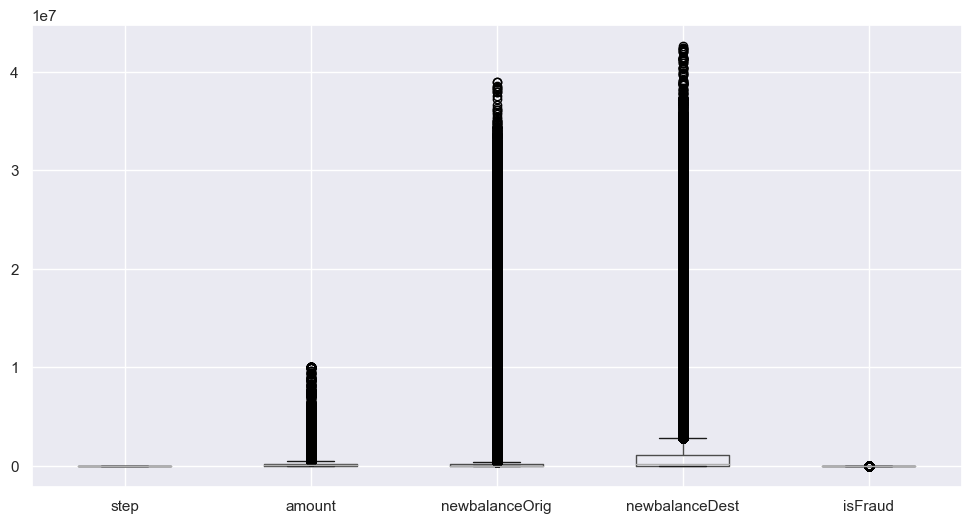

In [26]:
# Treating ouliers
new_df.boxplot(figsize=(12,6))
     

In [27]:
numeric_columns = new_df.select_dtypes(include=['int64','float64'])

# Calculate quantiles for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# The rest of your code to detect outliers should remain the same
def detect_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = new_df[(new_df[column] < lower_bound) | (new_df[column] > upper_bound)]
    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(new_df)) * 100
        return column, percentage

columns_with_outliers = [detect_outliers(column) for column in numeric_columns.columns]
columns_with_outliers = [(column, percentage) for column, percentage in columns_with_outliers if column is not None]

for column, percentage in columns_with_outliers:
    print(f"Column: {column}, Percentage of outliers: {percentage:.2f}%")

Column: amount, Percentage of outliers: 5.04%
Column: newbalanceOrig, Percentage of outliers: 16.40%
Column: newbalanceDest, Percentage of outliers: 11.06%
Column: isFraud, Percentage of outliers: 0.09%


In [28]:
# removing outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [29]:
low_leadtime,high_leadtime=remove_outlier(new_df['newbalanceOrig'])
new_df['newbalanceOrig']=np.where(new_df['newbalanceOrig']>high_leadtime,high_leadtime,new_df['newbalanceOrig'])
new_df['newbalanceOrig']=np.where(new_df['newbalanceOrig']<low_leadtime,low_leadtime,new_df['newbalanceOrig'])

In [30]:
low_leadtime,high_leadtime=remove_outlier(new_df['newbalanceDest'])
new_df['newbalanceDest']=np.where(new_df['newbalanceDest']>high_leadtime,high_leadtime,new_df['newbalanceDest'])
new_df['newbalanceDest']=np.where(new_df['newbalanceDest']<low_leadtime,low_leadtime,new_df['newbalanceDest'])

## Encoding

In [31]:
# encoding 'type' column
new_df = pd.get_dummies(new_df, columns=['type'], prefix=['type'])
new_df.shape

(3000000, 12)

In [32]:
new_df.head()

,step,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,160296.36,M1979787155,0.00,0,0,0,0,1,0
1,1,1864.28,C1666544295,19384.72,M2044282225,0.00,0,0,0,0,1,0
2,1,181.00,C1305486145,0.00,C553264065,0.00,1,0,0,0,0,1
3,1,181.00,C840083671,0.00,C38997010,0.00,1,0,1,0,0,0
4,1,11668.14,C2048537720,29885.86,M1230701703,0.00,0,0,0,0,1,0


In [33]:
# encoding 'nameOrig' and 'nameDest'
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df['nameOrig']=le.fit_transform(new_df['nameOrig'])
new_df['nameDest']=le.fit_transform(new_df['nameDest'])

In [34]:
new_df.head(5)

,step,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,358086,160296.36,780575,0.00,0,0,0,0,1,0
1,1,1864.28,1033293,19384.72,814368,0.00,0,0,0,0,1,0
2,1,181.00,473430,0.00,208115,0.00,1,0,0,0,0,1
3,1,181.00,2749909,0.00,185468,0.00,1,0,1,0,0,0
4,1,11668.14,1625449,29885.86,390711,0.00,0,0,0,0,1,0


In [35]:
# Highly imbalanced
new_df['isFraud'].value_counts()

0    2997381
1       2619
Name: isFraud, dtype: int64

## Splitting

In [36]:
x=new_df.drop(['isFraud'],axis=1)
y=new_df['isFraud']

## Smoting

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x, y = smote.fit_resample(x, y)

In [38]:
y.value_counts()

0    2997381
1    2997381
Name: isFraud, dtype: int64

## Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=142)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4496071, 11)
(1498691, 11)
(4496071,)
(1498691,)


In [41]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

## Model Training

## Random Forest Classifier

In [42]:
# %% Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42,
                                verbose=1,class_weight="balanced")

rf_clf.fit(x_train_sc, y_train)
y_pred = rf_clf.predict(x_test_sc)
y_pred_proba = rf_clf.predict_proba(x_test_sc)[:,1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 24.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.0s finished


In [43]:
# Evaluate model performance for random forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.933916998233792
Precision: 0.9782305778350644
Recall: 0.8875366954534349
F1 Score: 0.9306793477119664


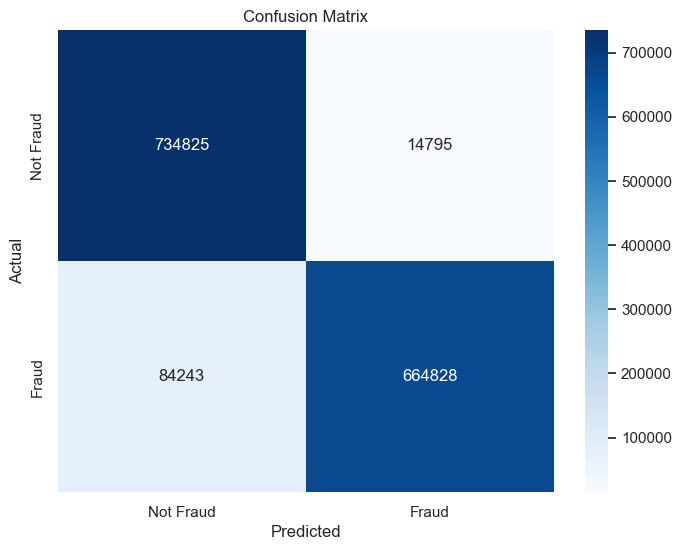

In [44]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

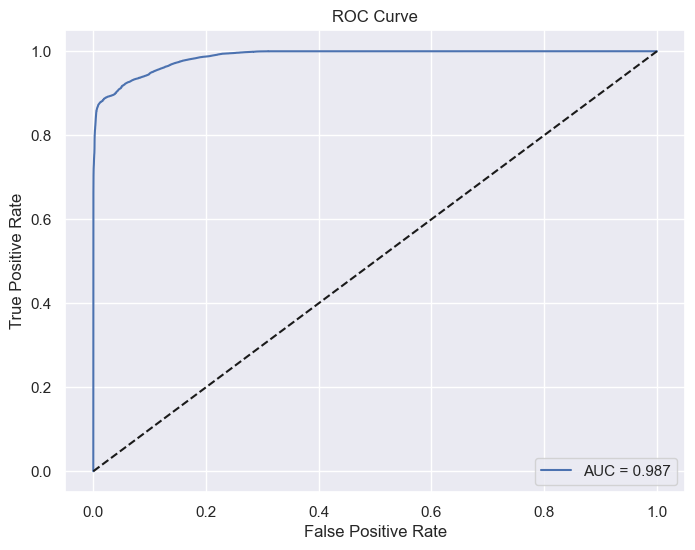

In [46]:
# ROC curve
from sklearn.metrics import  roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

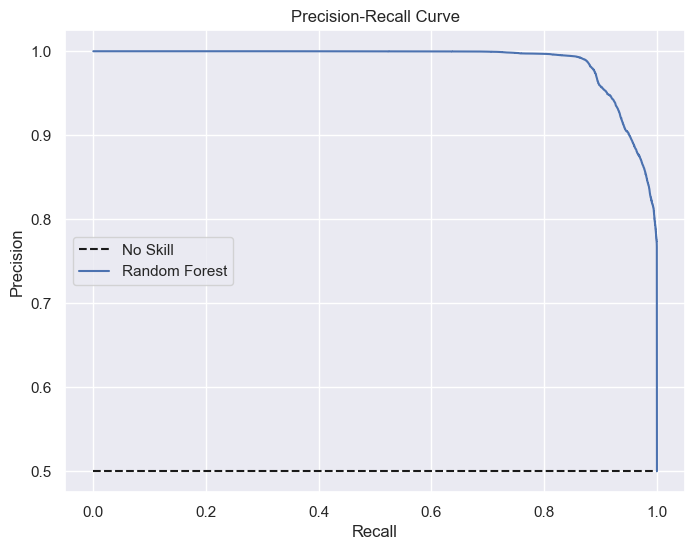

In [47]:
# Precision-Recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [no_skill, no_skill], 'k--', label='No Skill')
plt.plot(recall, precision, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [49]:
model = Sequential([
    Dense(64, input_shape=(x_train_sc.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [50]:
# Use a learning rate scheduler to improve training
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100, decay_rate=0.96, staircase=True
)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile model
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [51]:
# Better early stopping with restoration of best weights
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Use a larger batch size for faster training
batch_size = 128
  
# Train model with proper validation split
history = model.fit(
    x_train_sc, y_train,
    epochs=15,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/15
28101/28101 [==============================] - 68s 2ms/step - loss: 0.1679 - accuracy: 0.9197 - val_loss: 0.1531 - val_accuracy: 0.9279
Epoch 2/15
28101/28101 [==============================] - 68s 2ms/step - loss: 0.1629 - accuracy: 0.9223 - val_loss: 0.1531 - val_accuracy: 0.9279
Epoch 3/15
28101/28101 [==============================] - 67s 2ms/step - loss: 0.1630 - accuracy: 0.9223 - val_loss: 0.1531 - val_accuracy: 0.9279
Epoch 4/15
28101/28101 [==============================] - 68s 2ms/step - loss: 0.1629 - accuracy: 0.9223 - val_loss: 0.1531 - val_accuracy: 0.9279
Epoch 5/15
28101/28101 [==============================] - 74s 3ms/step - loss: 0.1629 - accuracy: 0.9222 - val_loss: 0.1531 - val_accuracy: 0.9279
Epoch 6/15
28101/28101 [==============================] - 84s 3ms/step - loss: 0.1632 - accuracy: 0.9222 - val_loss: 0.1531 - val_accuracy: 0.9279
Epoch 7/15
28101/28101 [==============================] - 75s 3ms/step - loss: 0.1629 - accuracy: 0.9224 - val_loss: 0

In [52]:
# Predictions (use the modern approach instead of predict_classes)
y_pred_proba = model.predict(x_test_sc)
y_pred = (y_pred_proba > 0.5).astype(int)


46835/46835 [==============================] - 48s 1ms/step


In [53]:
# Evaluate model performance for MLP.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9287338083701043
Precision: 0.9740697820326397
Recall: 0.8808644307415452
F1 Score: 0.925125449888045


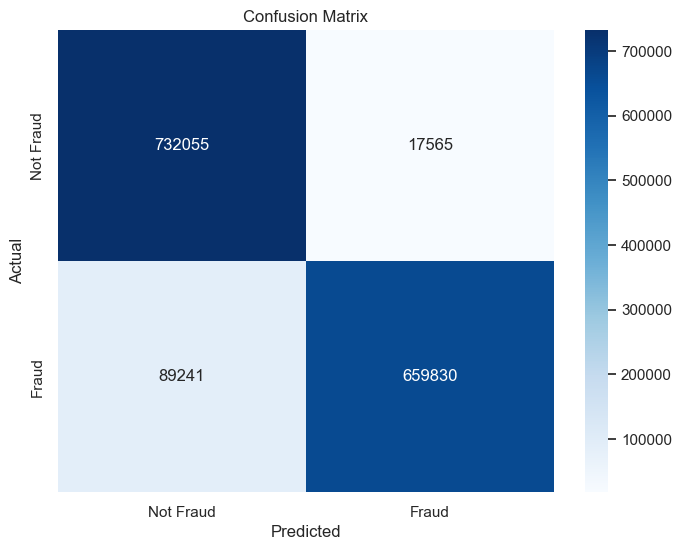

In [54]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

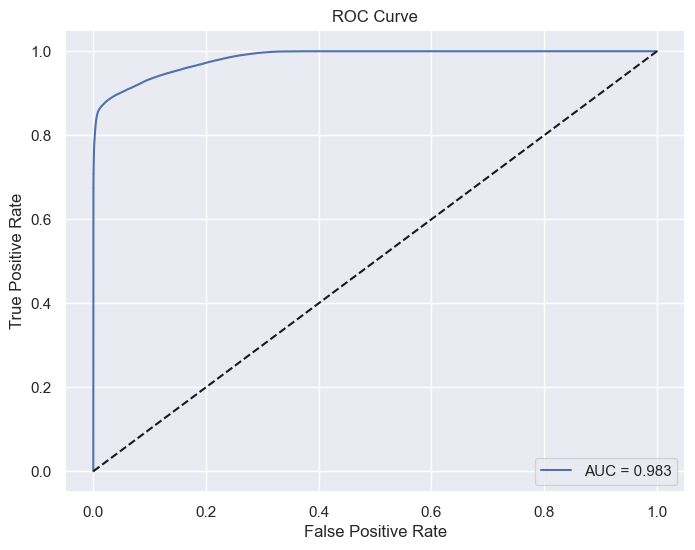

In [55]:
# ROC curve
from sklearn.metrics import  roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

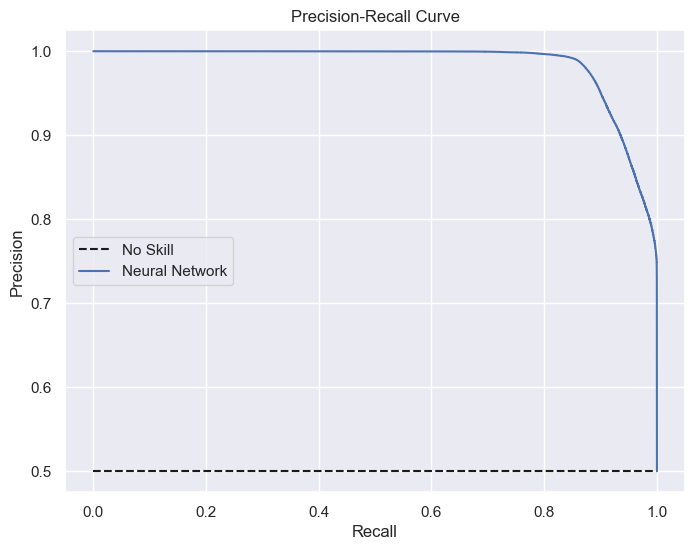

In [56]:
# Precision-Recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [no_skill, no_skill], 'k--', label='No Skill')
plt.plot(recall, precision, label='Neural Network')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()